Cargamos los dataset ya transformados a parquet

In [1]:
import pandas as pd

credits_df = pd.read_parquet('dataset_credits.parquet')
movies_df = pd.read_parquet('dataset_movies.parquet')

credits_df.head()

,id,cast_character,cast_name,crew_department,crew_job,crew_name
0,862,Woody (voice),Tom Hanks,Directing,Director,John Lasseter
1,8844,Buzz Lightyear (voice),Tim Allen,Writing,Screenplay,Joss Whedon
2,15602,Mr. Potato Head (voice),Don Rickles,Writing,Screenplay,Andrew Stanton
3,31357,Slinky Dog (voice),Jim Varney,Writing,Screenplay,Joel Cohen
4,11862,Rex (voice),Wallace Shawn,Writing,Screenplay,Alec Sokolow


In [2]:
movies_df.head()

,budget,id,original_title,overview,popularity,release_date,revenue,status,title,vote_average,vote_count,release_year,return
0,30000000,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,Released,Toy Story,7.7,5415,1995,12.451801
1,65000000,8844,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,Released,Jumanji,6.9,2413,1995,4.043035
2,0,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,Released,Grumpier Old Men,6.5,92,1995,0.000000
3,16000000,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,Released,Waiting to Exhale,6.1,34,1995,5.090760
4,0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,Released,Father of the Bride Part II,5.7,173,1995,0.000000


Resumen estadístico y revisión de valores nulos

In [4]:
movies_df.describe()

,budget,id,popularity,revenue,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,108027.103094,2.926458,1.112133e+07,5.624070,110.096439,1991.881193,6.600423e+02
std,1.743986e+07,112168.377996,6.009672,6.386574e+07,1.915423,491.742894,24.055360,7.469329e+04
min,0.000000e+00,2.000000,0.000000,-2.147484e+09,0.000000,0.000000,1874.000000,-9.061112e+00
25%,0.000000e+00,26385.750000,0.388840,0.000000e+00,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59857.500000,1.130454,0.000000e+00,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156533.500000,3.691695,0.000000e+00,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.068224e+09,10.000000,14075.000000,2020.000000,1.239638e+07


In [5]:
credits_df.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [7]:
movies_df.isnull().sum()

budget              0
id                  0
original_title      0
overview          941
popularity          0
release_date        0
revenue             0
status             80
title               0
vote_average        0
vote_count          0
release_year        0
return              0
dtype: int64

In [8]:
credits_df.isnull().sum()

id                   0
cast_character     596
cast_name           40
crew_department     19
crew_job            19
crew_name           19
dtype: int64

Visualización de distribuciones y detección de outliers

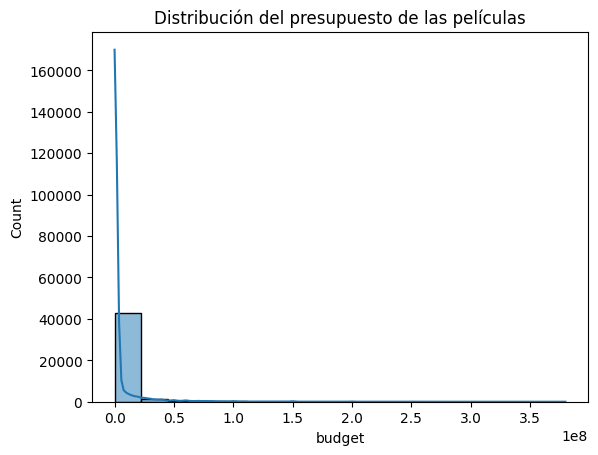

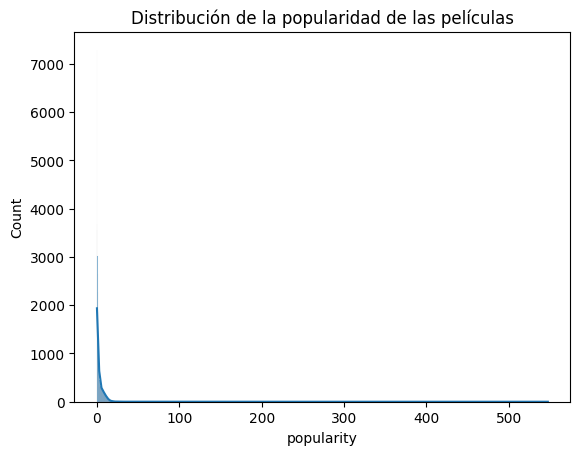

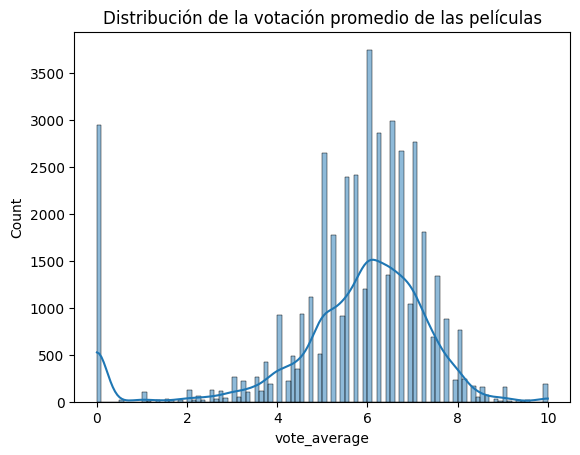

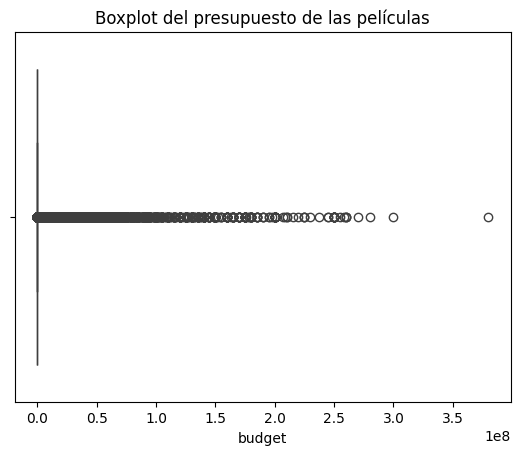

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución del presupuesto
sns.histplot(movies_df['budget'], kde=True)
plt.title('Distribución del presupuesto de las películas')
plt.show()

# Distribución de la popularidad
sns.histplot(movies_df['popularity'], kde=True)
plt.title('Distribución de la popularidad de las películas')
plt.show()

# Distribución de la votación promedio
sns.histplot(movies_df['vote_average'], kde=True)
plt.title('Distribución de la votación promedio de las películas')
plt.show()

# boxplot para identificar outliers en el presupuesto
sns.boxplot(x=movies_df['budget'])
plt.title('Boxplot del presupuesto de las películas')
plt.show()

Análisis de correlaciones

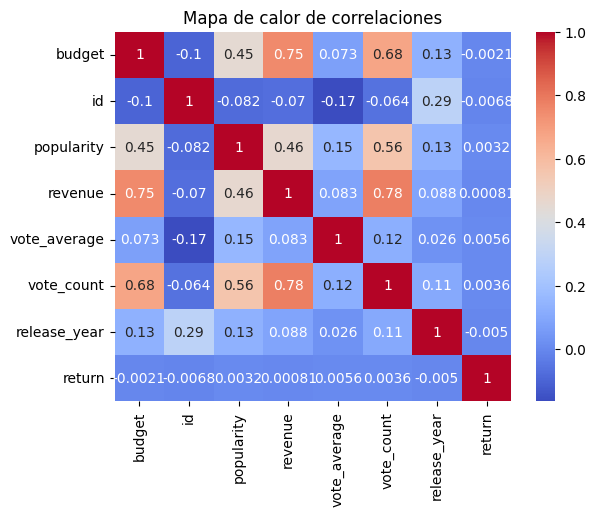

In [28]:
# columnas numéricas
numeric_columns = movies_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


Análisis de relaciones entre variables

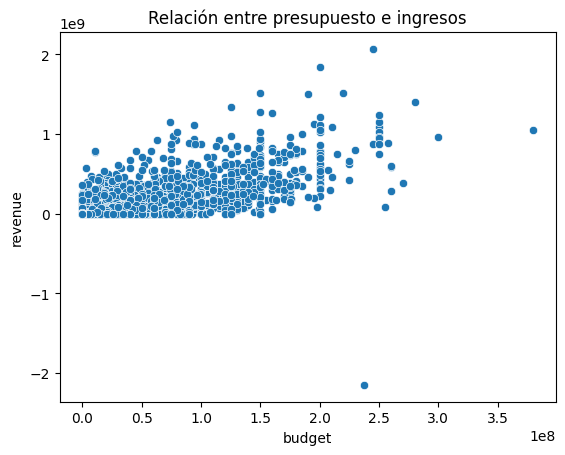

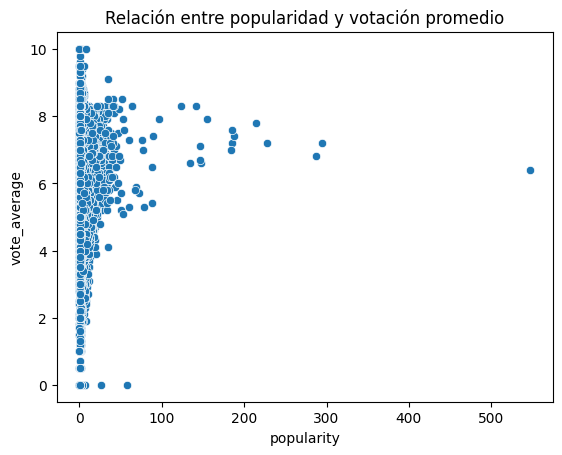

In [29]:
# Relación entre presupuesto y ingresos
sns.scatterplot(x=movies_df['budget'], y=movies_df['revenue'])
plt.title('Relación entre presupuesto e ingresos')
plt.show()

# Relación entre popularidad y votación promedio
sns.scatterplot(x=movies_df['popularity'], y=movies_df['vote_average'])
plt.title('Relación entre popularidad y votación promedio')
plt.show()


In [15]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 326.1 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 654.6 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.4 kB 923.9 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 930.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Nube de palabras (Word Cloud) para títulos

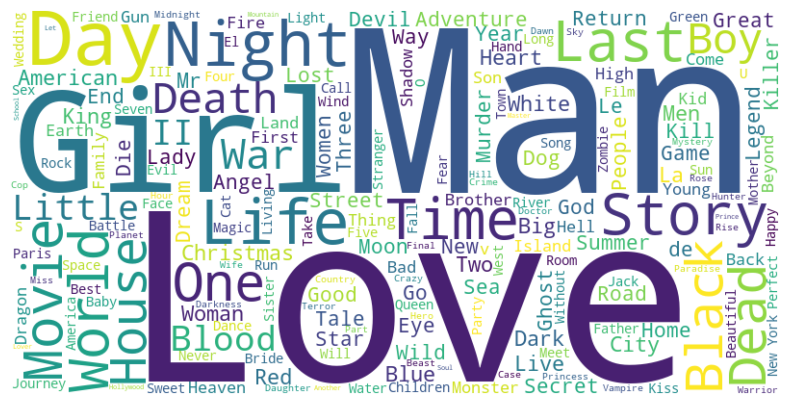

In [30]:
from wordcloud import WordCloud

# Concatenar todos los títulos en un solo texto
all_titles = ' '.join(movies_df['title'].dropna())

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Análisis de datos de reparto y equipo técnico

cast_name
Samuel L. Jackson     26
Steve Buscemi         26
Demi Moore            26
Whoopi Goldberg       25
Robert De Niro        23
Bess Flowers          23
Joan Cusack           23
John Cusack           22
Dan Aykroyd           22
Christopher Walken    22
Name: count, dtype: int64


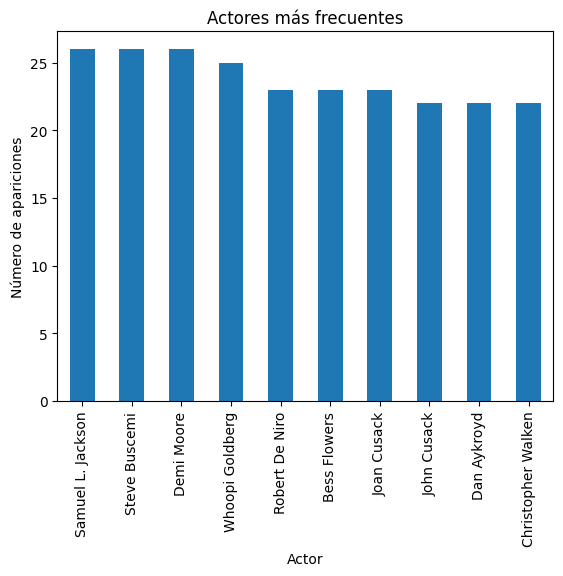

crew_name
Alfred Hitchcock    52
Woody Allen         14
Robert Stevenson    14
Stanley Kubrick     12
Steven Spielberg    11
Richard Donner      10
Martin Scorsese      9
Ron Howard           9
Barry Levinson       9
John Carpenter       9
Name: count, dtype: int64


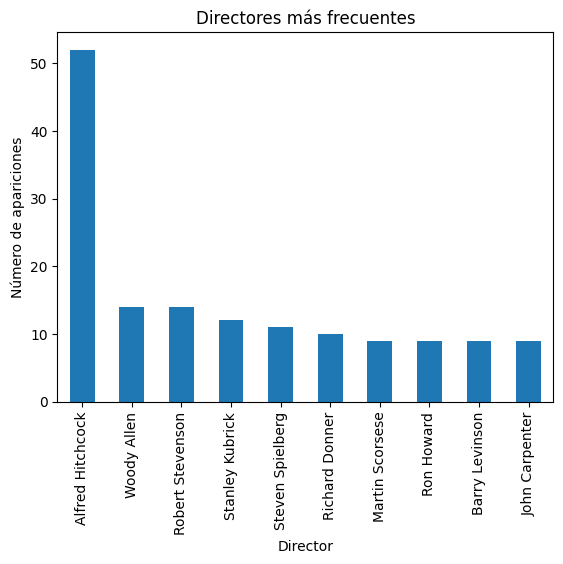

In [31]:
# Actores más frecuentes
top_actors = credits_df['cast_name'].value_counts().head(10)
print(top_actors)

# Gráfico de barras de los actores más frecuentes
top_actors.plot(kind='bar')
plt.title('Actores más frecuentes')
plt.xlabel('Actor')
plt.ylabel('Número de apariciones')
plt.show()

# Directores más frecuentes
top_directors = credits_df[credits_df['crew_job'] == 'Director']['crew_name'].value_counts().head(10)
print(top_directors)

# Gráfico de barras de los directores más frecuentes
top_directors.plot(kind='bar')
plt.title('Directores más frecuentes')
plt.xlabel('Director')
plt.ylabel('Número de apariciones')
plt.show()


Detección de anomalías

In [32]:
# Películas con presupuestos excepcionalmente altos
high_budget_movies = movies_df[movies_df['budget'] > movies_df['budget'].quantile(0.99)]
print(high_budget_movies[['title', 'budget', 'revenue']])

# Películas con ingresos excepcionalmente bajos respecto al presupuesto
low_revenue_movies = movies_df[(movies_df['revenue'] < movies_df['budget'] * 0.1) & (movies_df['budget'] > 0)]
print(low_revenue_movies[['title', 'budget', 'revenue']])


                                             title     budget    revenue
14                                Cutthroat Island   98000000   10017322
150                                 Batman Forever  100000000  336529144
162                     Die Hard: With a Vengeance   90000000  366101666
170                                    Judge Dredd   90000000  113493481
205                                     Waterworld  175000000  264218220
...                                            ...        ...        ...
43913                         Payback: Straight Up   90000000          0
44193               War for the Planet of the Apes  152000000  369907963
44255  Valerian and the City of a Thousand Planets  197471676   90024292
44596                                      Dunkirk  100000000  519876949
44759                Transformers: The Last Knight  260000000  604942143

[453 rows x 3 columns]
                                  title    budget  revenue
6                               Sabrina  

Exploración de patrones en el tiempo

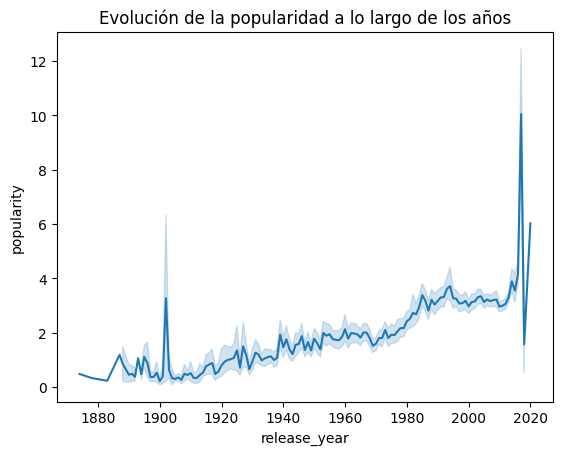

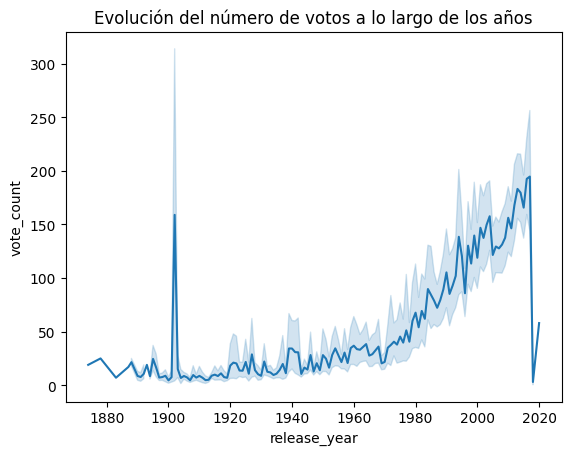

In [33]:
# Evolución de la popularidad a lo largo de los años
sns.lineplot(x='release_year', y='popularity', data=movies_df)
plt.title('Evolución de la popularidad a lo largo de los años')
plt.show()

# Evolución del número de votos a lo largo de los años
sns.lineplot(x='release_year', y='vote_count', data=movies_df)
plt.title('Evolución del número de votos a lo largo de los años')
plt.show()
